In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer

In [2]:
st = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")
data = pd.read_csv("./comments.csv")

comments = data[['textClean', 'videoId']]

text = comments["textClean"].values.tolist()

dico_font_video = {}

for i, videoid in enumerate(comments.videoId.unique()):
    dico_font_video[videoid] = i

font = [dico_font_video[videoid] for videoid in comments.videoId]

In [3]:
embs = st.encode(text)
pca = PCA(2).fit_transform(embs)

In [4]:
kmeans = KMeans(5, n_init=80, max_iter=2000).fit(embs)

In [5]:
center_indices = [
    int(np.argmin([np.sum((x-centroid)**2) for x in embs]))
    for centroid in kmeans.cluster_centers_]

commentaires_representants = [comments.textClean[i] for i in center_indices]
representants = ''
for i, comment in enumerate(commentaires_representants):
    representants += f'{i}:{comment} \n'
print(representants)

0:un régal, comme d'hab! merci pour ce très beau travail 
1:j'adore tes vidéos ! le montage est vraiment bien en plus, continue comme ça 
2:merci pour ton travail de recherche et de vulgarisation ❤️ 
3:édifiant... 
et super vidéo comme d'habitude. trop fier de te soutenir sur teepee. merci à toi pour l'intelligence que tu dispense autour de toi. 
4:le montage est toujours aussi bon c’est ouf 🤌🏼 



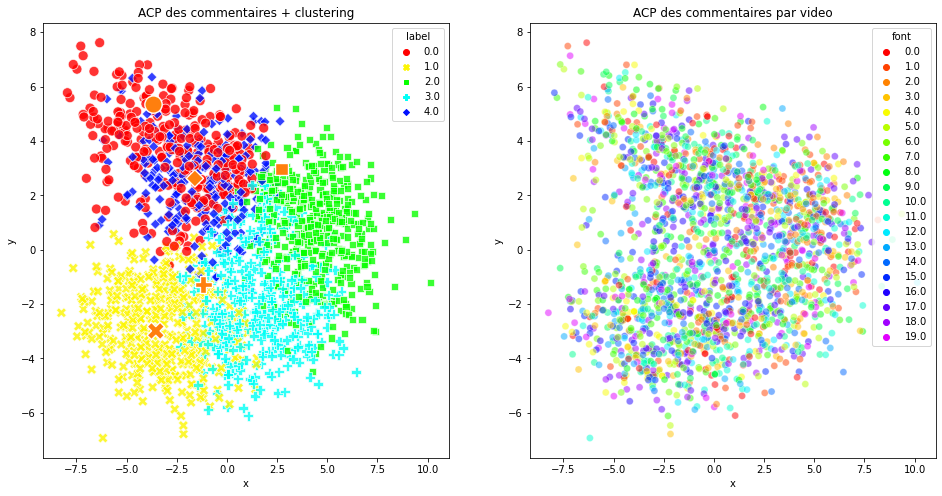

0:un régal, comme d'hab! merci pour ce très beau travail 
1:j'adore tes vidéos ! le montage est vraiment bien en plus, continue comme ça 
2:merci pour ton travail de recherche et de vulgarisation ❤️ 
3:édifiant... 
et super vidéo comme d'habitude. trop fier de te soutenir sur teepee. merci à toi pour l'intelligence que tu dispense autour de toi. 
4:le montage est toujours aussi bon c’est ouf 🤌🏼 



In [14]:
plt.subplots(figsize=(16, 8))

data = pd.DataFrame(np.array([pca[:, 0], pca[:, 1], font, kmeans.labels_]).transpose(),
                    columns=['x', 'y', 'font', 'label'])
data = data.sample(frac=1)

plt.subplot(121)
sns.scatterplot(data=data,
                x='x',
                y='y',
                hue='label',
                style='label',
                s=100,
                hue_norm=(0,6),
                alpha=.8,
                palette='hsv',
                legend='full')

sns.scatterplot(x=[pca[i, 0] for i in center_indices], 
                y=[pca[i, 1] for i in center_indices],
                style=[i for i in range(len(center_indices))],
                s=300,
                legend=False)
plt.title("ACP des commentaires + clustering")

plt.subplot(122)

sns.scatterplot(data=data,
                x='x',
                y='y',
                hue='font',
                hue_norm=(0, 23),
                s=50,
                palette='hsv',
                alpha=.5,
                legend='full')
plt.title("ACP des commentaires par video")

plt.show()
print(representants)

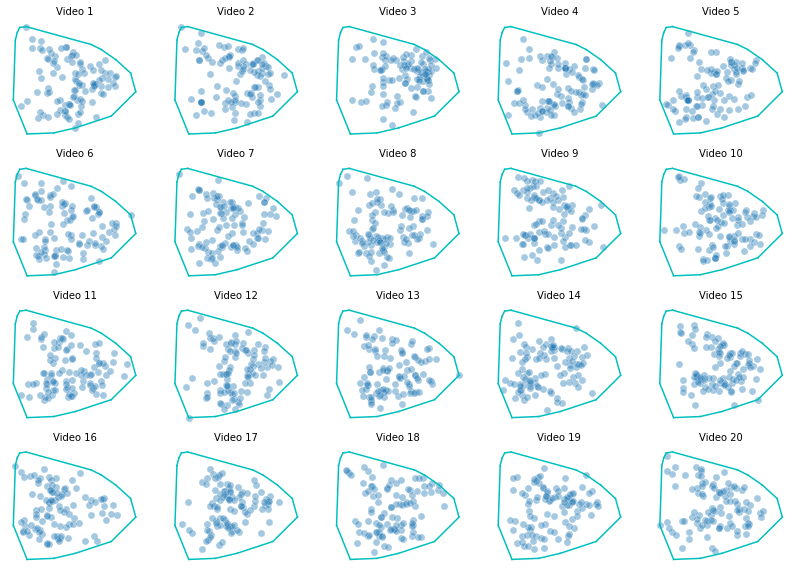

In [7]:
from scipy.spatial import ConvexHull

hull = ConvexHull(pca)

fig, axs = plt.subplots(4, 5, figsize=(14, 10))
for i, ax in enumerate(np.array(axs).flatten()):
    sns.scatterplot(x=[pca[j, 0] for j in range(len(font)) if font[j] == i],
                    y=[pca[j, 1] for j in range(len(font)) if font[j] == i],
                    s=50,
                    ax=ax,
                    alpha=0.4)
    for simplex in hull.simplices:
            ax.plot(pca[simplex, 0], pca[simplex, 1], 'c')
    ax.set_title(f'Video {i+1}', fontsize=10)
    ax.axis('off')
plt.show()

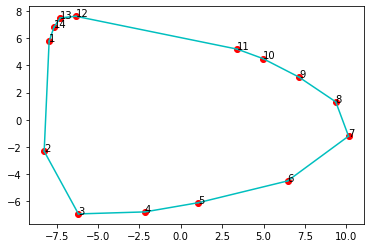

1 : merci beaucoup pour ce debrif ! c'est extrêmement intéressant et 1ccessuble donc continue à partager c génial 😉
 2 : merci pour ta vidéo. j'adore ta chaîne ! 😁
 3 : le montage de tes vidéos <3 c'est de l'art, et tes sujets sont toujours autant captivants, bravo !
 4 : vidéo extrêmement bien faite. bravo pour votre travail !
 5 : woooww mais que travail 😁, le montage aussi est clairement très reussi 😂
 6 : excellent épisode, pratiquement aussi barré que "le paradoxe des drogues douces ^^"
pour ceux qui veulent creuser le sujet dé-exctinction, il y a l'excellente vidéo "dé-exctinction" de la chaine entracte science
 7 : l'extrait de bojack à vraiment été subtilement bien placée 😂
le montage est excellent comme toujours ! merci pour ces magnifiques images et le travail méticuleux de l'équipe 😁👍
 8 : bravo pour ton livre, trop envie de l'acheter !
 9 : super vidéo, ça donne de l'espoir pour l'avenir. merci 😊
 10 : commençant tout juste ma thèse scientifique en biophysique je ne peux qu

In [15]:
for simplex in hull.simplices:
    plt.plot(pca[simplex, 0], pca[simplex, 1], 'c')
bound = np.array([pca[i] for i in hull.vertices])
plt.scatter(x=bound[:, 0], y=bound[:, 1], color='r')
for name, vect in zip(range(len(bound)), bound):
    plt.annotate(name+1, vect)
plt.show()
ind = data.index.to_list()
print(*[f'{i+1} : ' + text[ind[j]]+'\n' for i, j in enumerate(hull.vertices)])

In [17]:
def find_remerciement(string):
    return ('merci' in string) or ('thank' in string) or ('thx' in string)
data = data.sort_index() # On remet les commentaire dans l'ordre de leurs indices
remerciements =  data.iloc[[i for i in range(len(data)) if find_remerciement(text[i])]]
remerciements

,x,y,font,label
1162,-6.519055,-2.796968,11.0,1.0
829,-1.636848,0.444119,8.0,1.0
1369,1.040691,-1.181742,13.0,3.0
497,2.872323,-2.250170,4.0,3.0
1407,0.814612,-2.202745,14.0,3.0
...,...,...,...,...
1886,-6.057587,4.049908,18.0,0.0
278,1.134853,0.713221,2.0,3.0
136,-4.822953,5.378521,1.0,0.0
855,0.122729,-2.776271,8.0,3.0


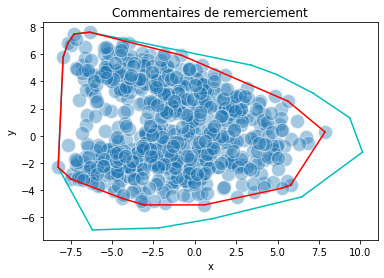

In [21]:
pca_remerciements = np.array(remerciements[['x','y']])
hull_remerciements = ConvexHull(pca_remerciements)

sns.scatterplot(data=remerciements,
                x='x',
                y='y',
                s=200,
                alpha=.4,
                legend='full')
for simplex in hull.simplices:
    plt.plot(pca[simplex, 0], pca[simplex, 1], 'c')
for simplex in hull_remerciements.simplices:
    plt.plot(pca_remerciements[simplex, 0], pca_remerciements[simplex, 1], 'r')
plt.title("Commentaires de remerciement")
plt.show()